In [1]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
import numpy as np
from scipy.signal import find_peaks

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
df_raw = pd.read_csv('dataset/ETTh1.csv')
scaler = StandardScaler()
cols_data = df_raw.columns[1:]
df_data = df_raw[cols_data]

train_data = df_data[:12*30*24]
scaler.fit(train_data.values)
data = scaler.transform(df_data.values)

train_data = data[:12*30*24]
test_data = data[16*30*24:20*30*24]

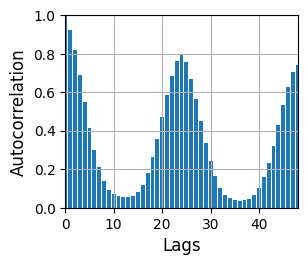

In [3]:
# Calculate autocorrelation coefficients
acf_values = acf(train_data[:,0], nlags=48)

# Plot the bar chart
lags = np.arange(len(acf_values))
plt.figure(figsize=(3, 2.5))
plt.bar(lags, acf_values)  # use bar plot

plt.xlim([0, 48])
plt.ylim([0, 1])

plt.xlabel("Lags", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)

plt.grid(True)
plt.show()

In [4]:
# Find peaks in autocorrelation function
peaks, _ = find_peaks(acf_values)

# Identify the lag corresponding to the highest peak
main_period = peaks[0]

print("Main period detected at lag:", main_period)

Main period detected at lag: 24
